3.1 MNIST
-------------


In [1]:
# pg.127 : MNIST 데이터셋 내려받기

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- DESCR 키 : 데이터셋 설명
- data 키 : 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열 가짐
- target 키 : 레이블 배열 담음

In [3]:
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

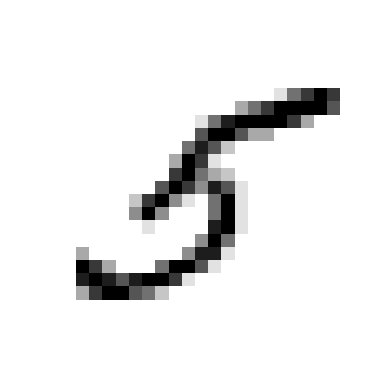

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[35]
some_digit_image = some_digit.reshape(28, 28)

# 맷플롯립의 imshow()함수 이용해서 그리기
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [10]:
y[0]

'5'

In [12]:
import numpy as np
y = y.astype(np.uint8)

데이터를 자세히 조사하기 전에 : 항상 테스트 세트 만들고 분리하기 !

In [14]:
# pg.130 : 훈련 세트 60000, 테스트 세트 10000개로 나누기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

3.2 이진 분류기 훈련
--------------------------
SGDClassifier 클래스를 이용해서 확률적 경사 하강법 분류기 이용
- 큰 데이터셋을 효율적으로 처리 가능
- 한 번에 하나씩 훈련 샘플을 독립적으로 처리함

In [15]:
y_train_5 = (y_train == 5)  # 5는 True, 다른 숫자는 False
y_test_5 = (y_test == 5)

In [18]:
# pg.130 : SGDClassifier 모델 만들기 + 훈련하기
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)    # 무작위성으로 훈련하니깐 random_state 이용해서 결과 재현
sgd_clf.fit(X_train, y_train_5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=42)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

분류기가 이미지가 5를 나타낸다고 추측함 -> 정확히 맞춤

3.3 성능 측정
--------------------
3.3.1 교차 검증을 사용한 정확도 측정
------------------------------------------
사이킷런의 cross_val_score() 함수와 거의 같은 작업 수행하고 동일 결과 출력하기

- StratifiedKFold : 클래스별 비율이 유지되도록 폴드를 만들기 위해 계층적 샘플링 수행

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, random_state=42)
skfolds = StratifiedKFold(n_splits=3, random_state=None)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)  # sgd_clf 복제
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9633


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.95695
0.9146


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


cross_val_score() 함수로 폴드가 3개인 k교차검증 사용해서 SGDClassifier 모델 평가하기

- K교차검증 : 훈련세트를 k개의 폴드로 나누고, 각 폴드에 대해 예측을 만들고 평가하기 위해 나머지 폴드로 훈련시킨 모델을 사용함

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8684 , 0.85975, 0.85475])

In [26]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [27]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

정확도가 90% 이상

불균형한 데이터셋일 때 정확도를 선호하지 않음 !

3.3.2 오차 행렬
------------------
cross_val_predict() 함수 이용해서 실제 타깃과 비교할 수 있는 예측값 만들기

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([ True, False, False, ...,  True, False,  True])

cross_val_predict()함수
- k교차검증 수행
- 평가점수를 반환 x / 각 테스트 폴드에서 얻은 예측 반환 o
- 훈련 세트의 모든 샘플에 대해 깨끗한 예측 얻기 가능

confusion_matrix() 이용해서 오차행렬 만들기

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred )

array([[52336,  2243],
       [ 1060,  4361]])

오차행렬의 행 : 실제 클래스

오차행렬의 열 : 예측한 클래스

In [30]:
y_train_perfect_predictions = y_train_5   # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

정밀도 = TP / (TP + FP)  -> 양성 예측의 정확도
- TP : 진짜 양성의 수 , FP : 거짓 양성의 수

재현율 = TP / (TP + FN)
- 분류기가 정확하게 감지한 양성 샘플의 비율 = 민감도 = 진짜 양성 비율

3.3.3 정밀도와 재현율
-------------------------
사이킷런에서 분류기의 지표 계산하는 함수 제공

In [31]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.6603573591762568

예제에서는 정밀도가 정확도보다는 별로임

F1 점수 : 정밀도와 재현율의 조화 평균

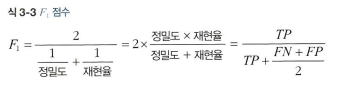

In [32]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7253222453222454

정밀도와 재현율이 비슷한 분류기 -> F1점수 높음

3.3.4 정밀도/재현율 트레이드오프
-------------------------------------
SGDClassifier 분류기
- 결정함수 이용해서 샘플 점수 계산
- 샘플 점수 > 임계값  -> 양성 클래스에 할당 (아니면 음성)
- 임계값 높이면 재현율 낮아지고 정밀도 높아짐 (반대도 성립)

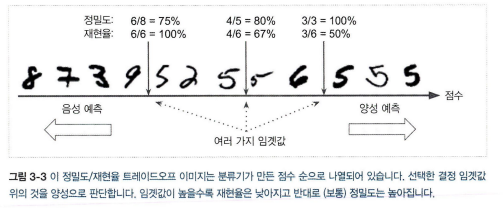

사이킷런에서 decision_function() : 각 샘플의 점수 얻기

In [33]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([75189.53498943])

In [37]:
threshold = 0   # SGDClassifier의 임계값 : 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [42]:
threshold = 200000    # 임계값 높이면 재현율 줄어들어서 false 출력
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [44]:
# pg.138 : 결정 점수 반환받도록 지정하기
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [45]:
# precision_recall_curve()함수 이용해서 가능한 모든 임계값에 대해 정밀도, 재현율 계산하기
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

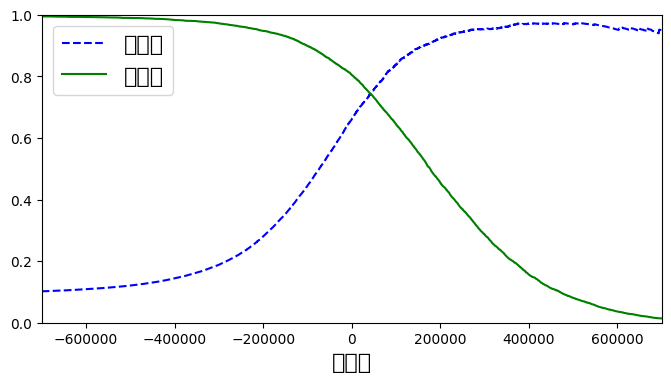

In [47]:
# 임곗값의 함수로 정밀도, 재현율 그리기

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

정밀도 곡선이 재현율 곡선보다 더 울퉁불퉁한 이유
- 임곗값을 올려도 정밀도가 가끔 낮아질 때가 있음

좋은 정밀도/재현율 트레이드오프를 선택하는 법
1. 재현율에 대한 정밀도 곡선 그리기
2. 정밀도가 급격히 줄어드는 지점 직전을 선택하기 -> 그림에서는 재현율 80% 근처

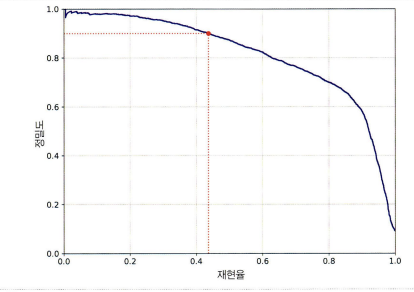

In [49]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [51]:
y_train_pred_90 = (y_scores > threshold_90_precision)

0.9002203336480957

정밀도와 재현율 확인해보기

In [53]:
precision_score(y_train_5, y_train_pred_90)

0.9002203336480957

In [52]:
recall_score(y_train_5, y_train_pred_90)

0.5275779376498801

3.3.5 ROC 곡선
------------------
수신기 조작 특성(ROC) 곡선
- 거짓 양성 비율에 대한 진짜 양성 비율의 곡선
- 1 - 진짜 음성 비율(TNR = 특이도)
- 민감도(재현율)에 대한 1-특이도 그래프

roc_curve()함수로 ROC 곡선 그리기

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

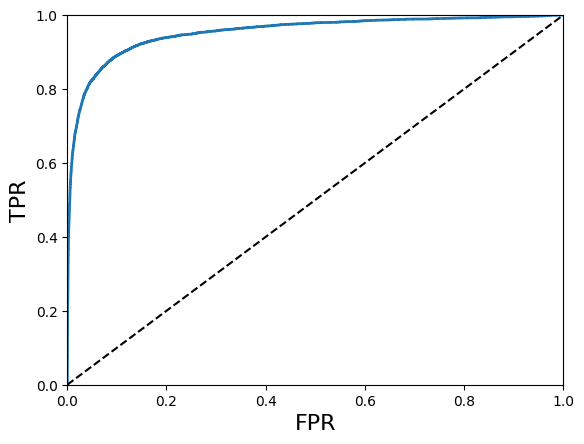

In [56]:
# 맷플롯립 이용해서 TPR에 대한 FPR 곡선 그리기

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)

plot_roc_curve(fpr, tpr)
plt.show()

점선 : 완전한 랜덤 분류기의 ROC곡선을 뜻함

좋은 분류기 : 점선에서 최대한 멀리 떨어져 있어야 함 (왼쪽 위 모서리) -> ROC의 AUC = 1이면 완벽한 분류기

완전한 랜덤 분류기 : 0.5

곡선 아래의 면적(AUC) -> 분류기 비교가능

In [58]:
# 사이킷런에서 roc의 auc 계산하기

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9536789698168869

RandomForestClassifier 훈련시켜서 SGDClassifier의 ROC곡선, ROC AUC 점수 비교하기

랜덤포레스트 분류기 : 결정함수 메서드 X -> predict_proba() 이용

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [61]:
# 양성 클래스 확률을 점수로 사용하기
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

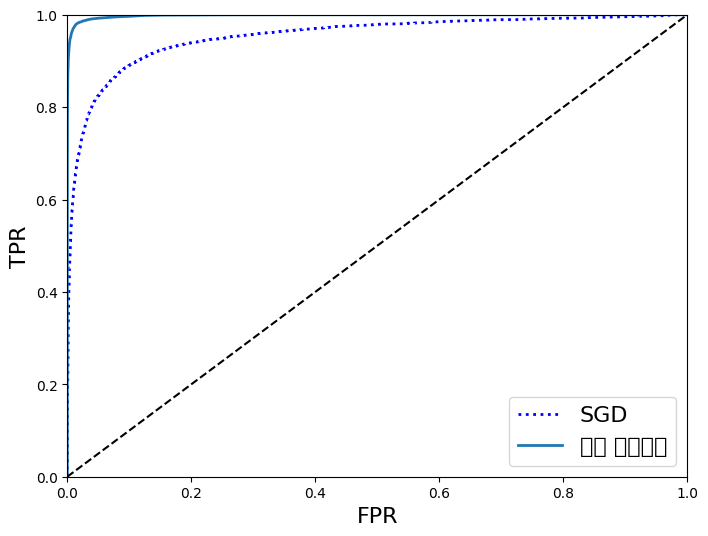

In [62]:
# 첫 번째 ROC 곡선 그리기
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right")
plt.show()

랜덤포레스트 분류기가 SGD 분류기보다 훨씬 좋음
- 랜덤 포레스트의 ROC곡선이 왼쪽 위 모서리에 더 가까워서 AUC 값이 더 큼

In [63]:
# 정밀도, 재현율 점수 계산하기
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

3.4 다중 분류
-------------
이중 분류 : 두 클래스 구별

다중 분류기(다항 분류기) : 둘 이상의 클래스 구별

1. OvR전략(OvA) : 이미지 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택

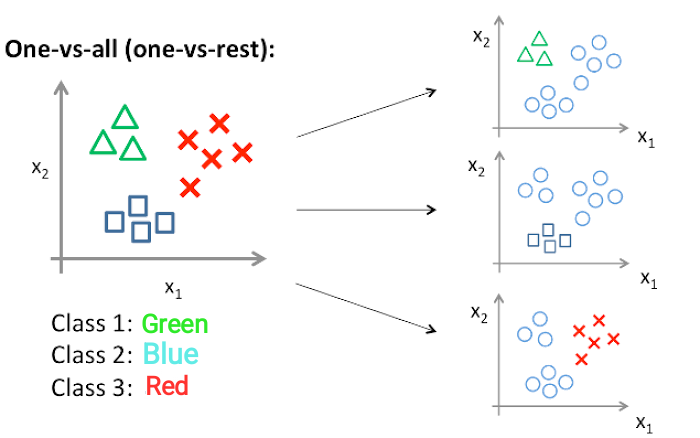

2. OvO전략 : 각 숫자의 조합마다 이진 분류기를 훈련시키기
- 클래스가 n개이면 분류기는 n*(n-1)/2개 필요
- 장점 : 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요

sklearn.svm.SVC 클래스 이용해서 서포트 벡터 머신 분류기 테스트하기

In [64]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [65]:
# decision_function() : 샘플 당 10개의 점수(클래스마다 하나씩임) 반환
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([75189.53498943])

In [66]:
np.argmax(some_digit_scores)

0

In [67]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [68]:
svm_clf.classes_[5]

5

사이킷런에서 OvO, OvR 강제사용법 : OneVsOneClassifier나 OneVsRestClassifier 사용
- 이진 분류기 인스턴스 만들어서 객체 생성할 떄 전달하기

In [74]:
# SVC 기반으로 OvR 전략 사용하는 다중 분류기 만들기
from sklearn.multiclass import OneVsOneClassifier

ovr_clf = OneVsOneClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [75]:
len(ovr_clf.estimators_)

45

In [76]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [78]:
# decision_function() : 클래스마다 하나의 값 반환
# SGD 분류기가 클래스마다 부여한 점수 확인하기

sgd_clf.decision_function([some_digit])

array([75189.53498943])

In [79]:
# cross_val_score() 이용해서 SGDClassifier 정확도 평가하기

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8684 , 0.85975, 0.85475])

84% 이상 -> 랜덤 분류기 사용했으면 10% -> 점수가 나쁘지는 않음

입력의 스케일 조정하면 정확도를 더 높일 수 있음

In [80]:
# StandardScaler를 이용해 데이터 스케일 조정하기

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.906  , 0.9074 , 0.91205])

3.5 에러 분석
---------------

In [82]:
# cross_val_predict()로 예측 만들기 + 오차행렬 함수 호출하기
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5734,    2,   26,    9,   11,   45,   42,    9,   41,    4],
       [   1, 6482,   42,   31,    7,   40,    6,    9,  112,   12],
       [  58,   41, 5293,  106,   90,   31,   93,   60,  169,   17],
       [  49,   40,  143, 5322,    4,  236,   37,   57,  150,   93],
       [  25,   25,   33,    9, 5359,    8,   54,   29,   95,  205],
       [  77,   44,   38,  180,   81, 4603,   99,   23,  183,   93],
       [  36,   31,   42,    2,   41,  102, 5617,    3,   44,    0],
       [  31,   26,   73,   34,   57,   14,    3, 5750,   19,  258],
       [  48,  164,   69,  139,   12,  160,   49,   21, 5054,  135],
       [  44,   35,   23,   89,  153,   39,    2,  186,   83, 5295]])

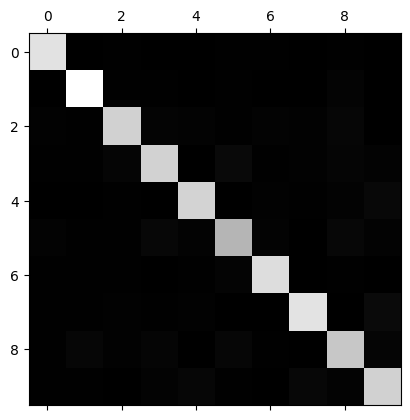

In [83]:
# matshow() 이용해서 이미지로 표현하기
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

오차행렬이 대부분 주대각선에 위치 -> 매우 좋음

숫자 5 : 다른 숫자보다 조금 어두움
- 숫자 5의 이미지가 적은 경우
- 분류기가 숫자 5를 다른 숫자만큼 잘 분류하지 못하는 경우

In [84]:
# 에러 비율 비교하기
# 에러 비율 : 오차행렬의 각 값 / 대응하는 클래스의 이미지 개수

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

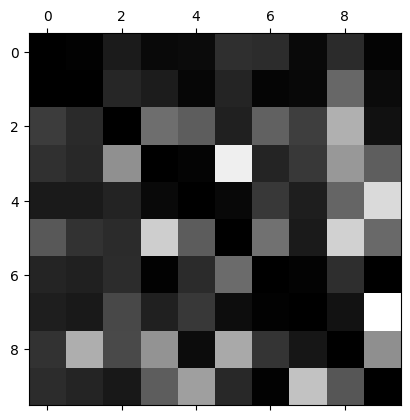

In [85]:
# 주대각선을 0으로 채워서 그래프 그리기
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

8열 : 밝음 -> 많은 이미지가 8로 잘못 분류됨을 암시

8행 : 나쁘지 않음 -> 실제 8이 적절히 8로 분류됨을 암시
- 오차행렬이 반드시 대칭 x

In [92]:
# 맷플롯립의 imshow() 사용하는 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

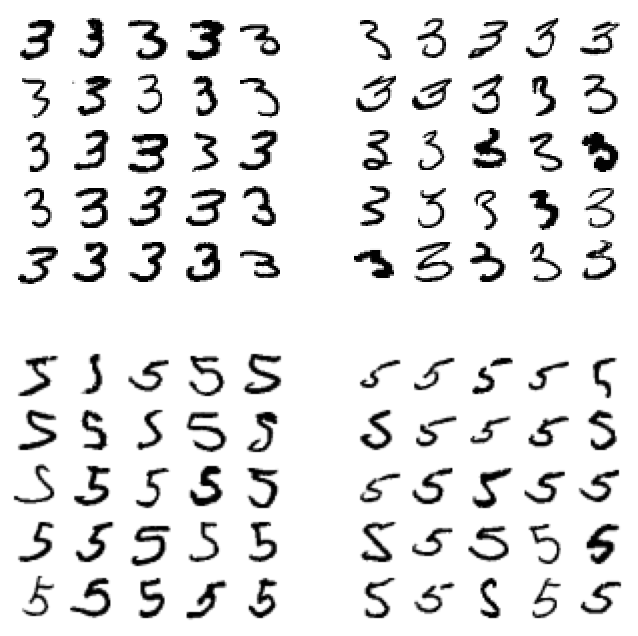

In [93]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

선형모델인 SGDClassifier 사용 -> 분류기가 실수한 이유를 이해하기 어려움

선형 분류기
- 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산함

3.6 다중 레이블 분류
------------------------
다중 레이블 분류 : 여러 개의 이진 꼬리표를 출력하는 분류 시스템
- 샘플마다 여러 개의 클래스 출력하는 경우


In [94]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [96]:
knn_clf.predict([some_digit])

array([[False,  True]])

올바르게 분류됨 -> 숫자 5는 크지 않고, 홀수

In [97]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

0.976410265560605


3.7 다중 출력 분류
--------------------------
한 레이블이 다중 클래스가 될 수 있도록 일반화한 것

In [98]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [100]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

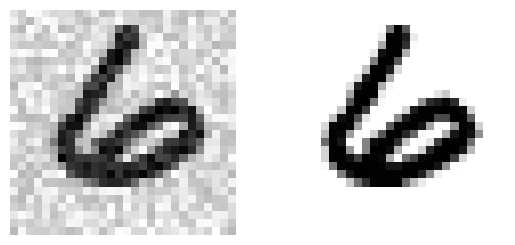

In [101]:
some_index = 5501
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

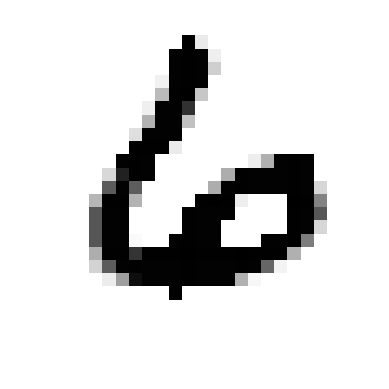

In [102]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)